# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the clean dataset
prices = pd.read_parquet(r'..\data\processed\training_cleaned.parquet')

In [3]:
# Look at columns
with pd.option_context("display.max_columns", None):
    display(prices[sorted(prices.columns)].sample(10))

,BedroomAbvGr,BldgType,BsmtCond,BsmtFinSF1,BsmtFinType1,BsmtQual,CentralAir,Electrical,EnclosedPorch,ExterCond,ExterQual,Fireplaces,Foundation,Functional,GarageArea,GarageCars,GarageType,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,X1stFlrSF,X2ndFlrSF,X3SsnPorch,YearRemodAdd,YrSold,area,price
557,2,1Fam,TA,864,BLQ,TA,Y,SBrkr,0,TA,TA,0,CBlock,Typ,440,1,Attchd,GasA,TA,1Story,1,TA,Lvl,9079,Inside,IR1,0,20,RL,Sawyer,0,5,5,Y,0,Normal,0,Pave,5,864,AllPub,158,864,0,0,1961,2009,864,122000
2255,2,TwnhsE,TA,949,GLQ,Gd,Y,SBrkr,0,TA,Gd,2,BrkTil,Typ,512,2,Attchd,GasA,Ex,1Story,1,Gd,Lvl,4054,Inside,IR1,0,120,RL,Timber,0,6,7,Y,0,Normal,0,Pave,5,1501,AllPub,240,1501,0,0,1987,2007,1501,244000
2813,3,1Fam,TA,0,Unf,Gd,Y,SBrkr,0,TA,TA,0,PConc,Typ,564,2,Attchd,GasA,Ex,2Story,1,Gd,Lvl,8846,Inside,Reg,0,60,RL,CollgCr,35,5,6,Y,0,Partial,0,Pave,6,750,AllPub,0,750,750,0,2006,2006,1500,173900
2137,3,1Fam,TA,539,ALQ,Gd,Y,SBrkr,0,TA,TA,0,CBlock,Typ,748,2,Detchd,GasA,TA,1Story,1,TA,Lvl,8982,CulDSac,IR1,0,20,RL,CollgCr,0,5,5,Y,0,Normal,0,Pave,5,1040,AllPub,0,1040,0,0,1977,2007,1040,134900
917,3,1Fam,Fa,0,Unf,TA,Y,SBrkr,0,TA,TA,1,BrkTil,Typ,215,1,Detchd,GasA,Ex,2Story,1,TA,Lvl,7155,Inside,Reg,0,70,RL,Crawfor,113,8,7,Y,0,Normal,195,Pave,6,600,AllPub,0,628,600,0,1990,2009,1228,137000
684,3,1Fam,TA,1148,BLQ,TA,Y,SBrkr,0,TA,TA,0,CBlock,Typ,672,1,Attchd,GasA,TA,1Story,1,TA,Lvl,7931,Inside,Reg,0,20,RL,NAmes,0,5,5,Y,0,Normal,0,Pave,6,1148,AllPub,0,1148,0,0,1959,2009,1148,132500
1489,3,1Fam,Gd,456,ALQ,Gd,Y,SBrkr,0,TA,TA,0,CBlock,Typ,504,2,BuiltIn,GasA,Ex,SFoyer,1,TA,Lvl,12102,Inside,Reg,0,85,RL,Edwards,0,5,5,Y,0,Family,0,Pave,6,456,AllPub,224,1033,0,0,1976,2008,1033,165000
2246,2,TwnhsE,TA,1573,GLQ,Gd,Y,SBrkr,0,TA,Gd,1,PConc,Typ,538,2,Attchd,GasA,Ex,1Story,1,Gd,HLS,4750,Inside,IR1,0,120,RM,Crawfor,0,5,8,Y,0,Family,153,Pave,5,1573,AllPub,123,1625,0,0,2007,2007,1625,235000
2386,4,1Fam,TA,0,Unf,Ex,Y,SBrkr,0,TA,Gd,1,PConc,Typ,853,3,BuiltIn,GasA,Ex,2Story,1,Gd,Lvl,14215,Corner,IR1,0,60,RL,NridgHt,154,5,8,Y,0,Partial,0,Pave,9,1158,AllPub,240,1158,1218,0,2006,2006,2376,325300
341,2,1Fam,Fa,564,Rec,Fa,Y,SBrkr,0,TA,TA,0,CBlock,Typ,502,1,Attchd,GasA,TA,1Story,1,TA,Lvl,13008,Inside,IR1,0,20,RL,NAmes,0,5,6,Y,0,Normal,0,Pave,5,882,AllPub,0,882,0,0,1956,2009,882,124500


<AxesSubplot: >

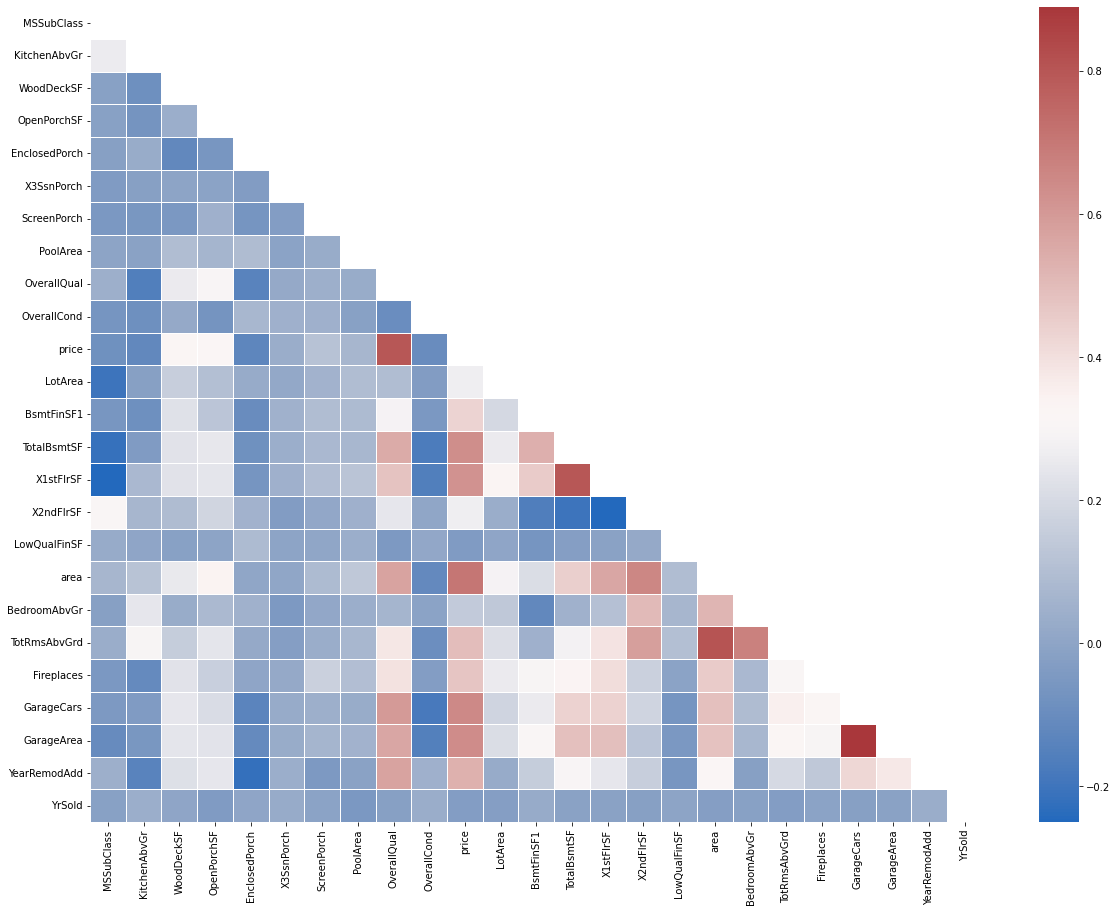

In [4]:
# Plot correlation
corr = prices.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,15))
sns.heatmap(corr, 
            cmap="vlag",
            mask=mask, 
            linewidths=1)

We see high correlations for OverallQuality and some other area based features. These are expected as the former is just an aggregate of how good of a condition the house is in. The latter also has a positive correlation because land prices come into account.

In [15]:
ohc_prices = pd.get_dummies(prices.select_dtypes('category'))\
                .merge(prices['price'], 
                       left_index=True, 
                       right_index=True)\
                .corr()['price']\
                .to_frame()\
                .reset_index()

In [17]:
plt.figure(figsize=(6, 0.25*len(ohc_prices)))
sns.barplot(ohc_prices.sort_values(by='price'),
            y='index',
            x='price',
            orient='h')

1.7435000757376466


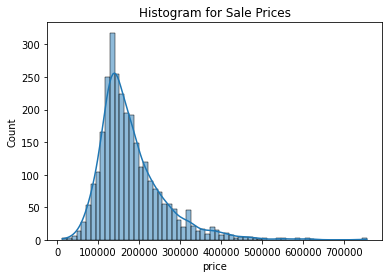

In [46]:
print(prices['price'].skew())
g = sns.histplot(x=prices['price'],
                kde=True)\
       .set(title='Histogram for Sale Prices')

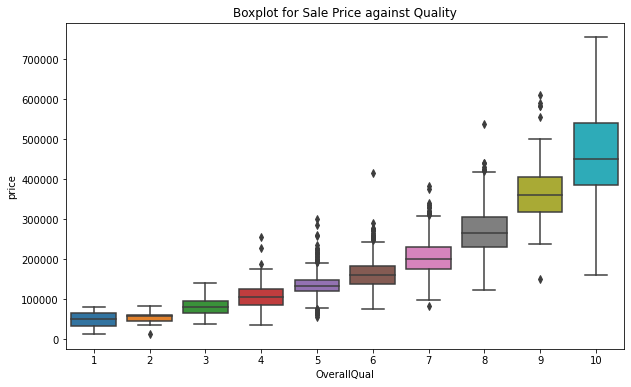

In [11]:
plt.figure(figsize=(10,6))
g = sns.boxplot(data=prices,
             y='price',
             x='OverallQual')\
       .set(title='Boxplot for Sale Price against Quality')

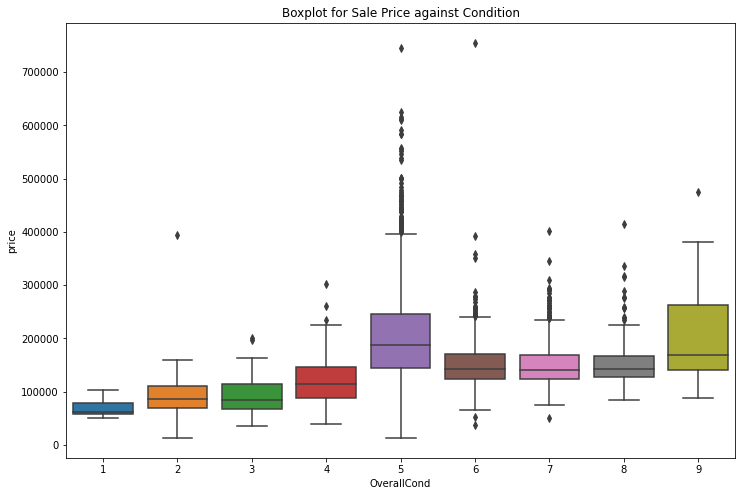

In [49]:
plt.figure(figsize=(12,8))
g = sns.boxplot(data=prices,
             y='price',
             x='OverallCond')\
       .set(title='Boxplot for Sale Price against Condition')

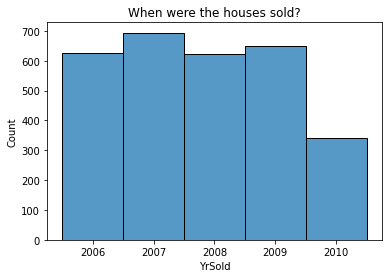

In [51]:
g = sns.histplot(x=prices['YrSold'].astype('category'))\
       .set(title='When were the houses sold?')

## Engineer Additional Columns

In [52]:
# Add Years To Sale column
prices['YearsToSale'] = prices['YrSold'] - prices['YearRemodAdd']
prices.drop(columns=['YrSold', 'YearRemodAdd'], inplace=True)

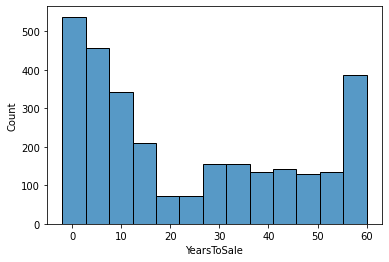

In [53]:
g = sns.histplot(x=prices['YearsToSale'])

In [54]:
prices.select_dtypes(exclude='category').columns

Index(['MSSubClass', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea', 'OverallQual',
       'OverallCond', 'price', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF',
       'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'area', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'YearsToSale'],
      dtype='object')

Text(30.236805555555563, 0.5, 'Lot Area (In Thousands sqft)')

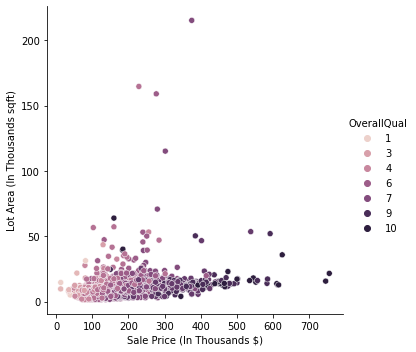

In [55]:
sns.relplot(data=prices,
           x=prices['price']/1000,
           y=prices['LotArea']/1000,
           hue='OverallQual')

plt.xlabel('Sale Price (In Thousands $)')
plt.ylabel('Lot Area (In Thousands sqft)')

In [35]:
prices = prices[prices['LotArea'] < 1e5] # Remove houses more than 1e5 feet in lot area
prices = prices[prices['price'] > 20000] # Remove houses costing less than 20k

In [33]:
prices.to_parquet(r'..\data\processed\training_cleaned_engineered.parquet')